Работаем в интернет-магазине , который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

Данные за 2016 год могут быть неполными.

## Подготовка данных

In [1]:
# подключим библиотеки Pandas, Numpy, SciPy, Math и matpolotlib
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt

In [2]:
# считаем данные из файла
games_data = pd.read_csv('/datasets/games.csv')

# и проверим чтение
games_data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# посмотрим на названия колонок
games_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Названия колонок нормально написаны, достаточно информативны, но начинаются с заглавных букв. Переименуем, чтоб были строчные

In [4]:
# переименуем колонки, чтоб названия все были в нижнем регистре
games_data.rename(columns={
                        'Name':'name',
                        'Platform':'platform',
                        'Year_of_Release':'year_of_release',
                        'Genre':'genre',
                        'NA_sales':'na_sales',
                        'EU_sales': 'eu_sales',
                        'JP_sales': 'jp_sales',
                        'Other_sales':'other_sales',
                        'Critic_Score':'critic_score',
                        'User_Score':'user_score',
                        'Rating':'rating'

                        }, inplace=True)
# проверим
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
### Код ревьювера ###

### Можно было сделать попроще:

games_data.columns = games_data.columns.str.lower()

Теперь можно проверить типы данных и заменить на корректные

In [6]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу видно, что user_score необходимо заменить на float, year_of_releas на date

In [7]:
# приведем year_of_release к формату даты
games_data['year_of_release'] = pd.to_datetime(games_data['year_of_release'], format='%Y')

# приведем user_score к формату float, некорректные значения принудительно заменим на NaN
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')

# проверим
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


теперь проверим на наличие явных дублей


In [8]:
games_data.duplicated().sum()

0

Отлично, явных дублей нет. Проверим пропуски данных. Но прежде посмотрим, как обстаят дела с платформами, жанрами и рейтингом игры, нет ли там не явных дублей.

In [9]:
games_data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
games_data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Отлично, неявных дублей в этих столбцах нет, можно приступить к обработке пропусков.

In [12]:
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Посмотрим у каких игр нет названия


In [13]:
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это какие-то очень старые игры, о которых мы ничего не знаем, кроме продаж и года выпуска. Пожалуй можно и удалить, их не много.

In [14]:
games_data.dropna(subset = ['name'], inplace = True)
games_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Посмотрим теперь на год выхода

In [15]:
games_data[games_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaT,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaT,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaT,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaT,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaT,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaT,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaT,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В эти строки данный были занесены не корректно. Можно потратить время и восстанавливать из названия и игровой платформы (потому что год выхода одной и той же игры в зависимости от игровой платформы может быть разным) по данным из интернета, но лучше зафиксировать этот момент и передать в руки тех, кто делал выгрузку из базы, а в целях анализа пометить эти строки. Можно пометить их как "unknown".

In [16]:
games_data['name'] = games_data['name'].fillna('unknown')
games_data[games_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaT,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaT,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaT,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaT,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaT,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaT,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaT,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Окей, это ни к чему не привело. Возможно, потому что у нас тип данных в столбце datetime, попробуем пометить их просто нулем.

In [17]:
games_data['name'] = games_data['name'].fillna(0)
games_data[games_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaT,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaT,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaT,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaT,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaT,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaT,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaT,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Тоже не прошло. Почитав stackoverflow узнали, что такое действительно происходит, потому что столбец типа datetime и нужно либо преобразовать ее в str, либо в object. Нам это не подходит, дата должна оставаться датой, а не строкой или объектом, поэтому просто снесем эти строки (благо их мало), дадим администратору бд багрепорт и будем делать анализ и ждать уточненную выгрузку, которую потом загрузим вместо исходных данных.

In [18]:
games_data.dropna(subset = ['year_of_release'], inplace = True)
games_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Посмотрим что происходит с оценками критиков, пользователей и рейтингом, есть предположение, что это еще не вышедшие игры.

In [19]:
games_data[games_data['critic_score'].isna()].head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [20]:
games_data[games_data['user_score'].isna()].tail()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016-01-01,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [21]:
games_data[games_data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Нет, у этих игр все нормально с датой релиза, поэтому и этот баг тоже нужно сообщить администатору бд, пускай обогощает данные. Ну а мы пока что пометим рейтинг критиков и пользователей как "-1", а рейтинг игры, как 'unknown'.

In [22]:
games_data['critic_score'] = games_data['critic_score'].fillna(-1)
games_data['user_score'] = games_data['user_score'].fillna(-1)
games_data['rating'] = games_data['rating'].fillna('unknown')
games_data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [23]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


Теперь мы можем добавить столбец с суммарными продажами во всех регионах

In [24]:
games_data['total_sales'] = (games_data['na_sales'] + games_data['eu_sales'] + 
                             games_data['jp_sales'] + games_data ['other_sales'])
games_data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


## Вывод

Мы подготовили исходные данные для дальнейшего анализа. Нужно дать багрепорт администатору бд, чтоб он обоготил данные на предмет даты выхода игр в зависимости от платформы; рейтинга критиков; рейтинга пользователей; рейтинга самих игр. Так же было бы здорово, если бы он все таки уточнил название игр в строках с индексами 659 и 14244 .

## Исследовательский анализ данных


 **Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.**

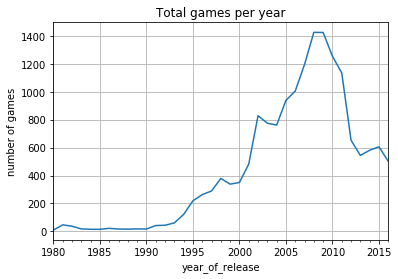

In [25]:
# чтобы у нас не было легенды, отключим ее в аргументах метода plot(legend=None)

games_data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, legend=None)
plt.ylabel('number of games')
plt.title('Total games per year')
plt.show()

Окей, пока все выглядит так, как будто мы можем отсечь хвост до 1990 года и не рассматривать игры вышедшие ранее. Чтобы убедиться в этом, посмотим по жанрам, может там одинакового жанра все выходили, тогда такое отсечение под вопросом.

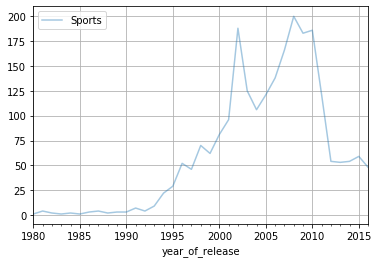

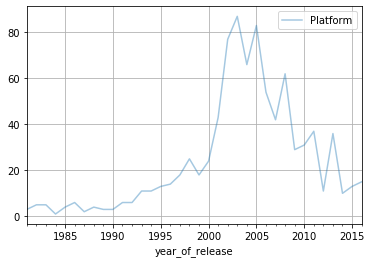

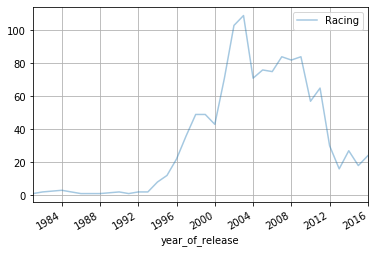

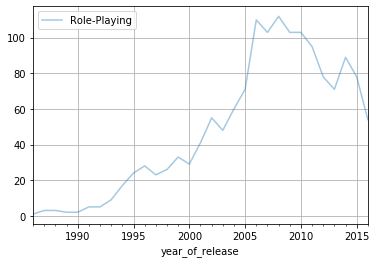

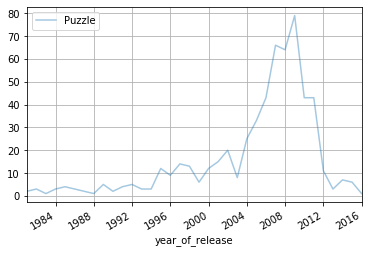

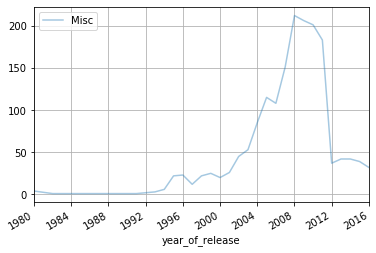

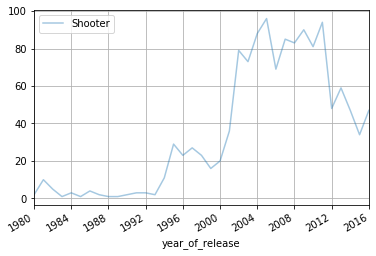

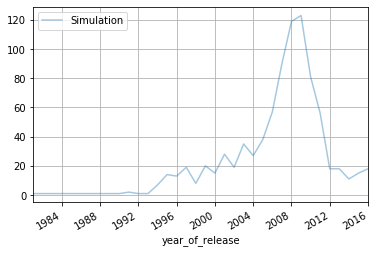

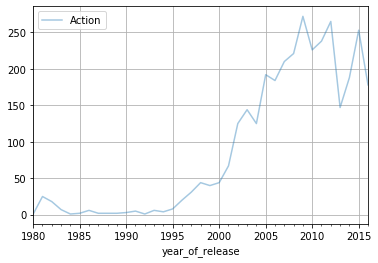

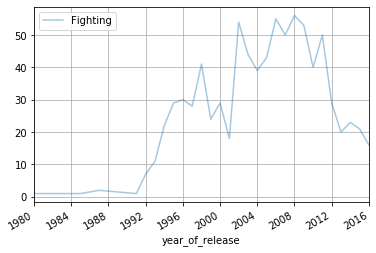

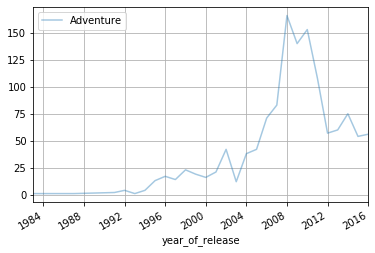

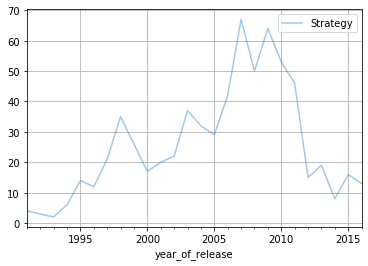

In [26]:
# создадим лист с жанрами и будем иттерироваться по нему. Пускай вкалывает робот, а не человек
genres = games_data['genre'].unique()

for genre in genres:
    games_data.query('genre == @genre').pivot_table(index='year_of_release', 
                                                    values='name', aggfunc='count').plot(grid=True, alpha=0.4)
    
    plt.legend((genre,)) # если сделать просто plt.legend(genre) то подпись будет только 1 буква слова
    plt.show()
    
    
  
    
    

**Вывод**

можно смело отсекать из рассмотрения игры вышедшие до 1990 года, там нет какого-либо доминирующего жанра, просто с этот период выходило мало игр впринципе. GemeDev был в основном уделом гиков, многие из которых писал себе игрушки сами, приставки были  не из дешевых, а копьютеры могли позволить себе лишь богачи. Зато игровые автоматы в магазинах процветали. 

***N.B: для более легкого сравнения дат в последующем, все же преобразуем дату в число, нам нужен лишь год.***


In [27]:
games_data['year_of_release']=pd.DatetimeIndex(games_data['year_of_release']).year
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


**Посмотрим, как менялись продажи по платформам**

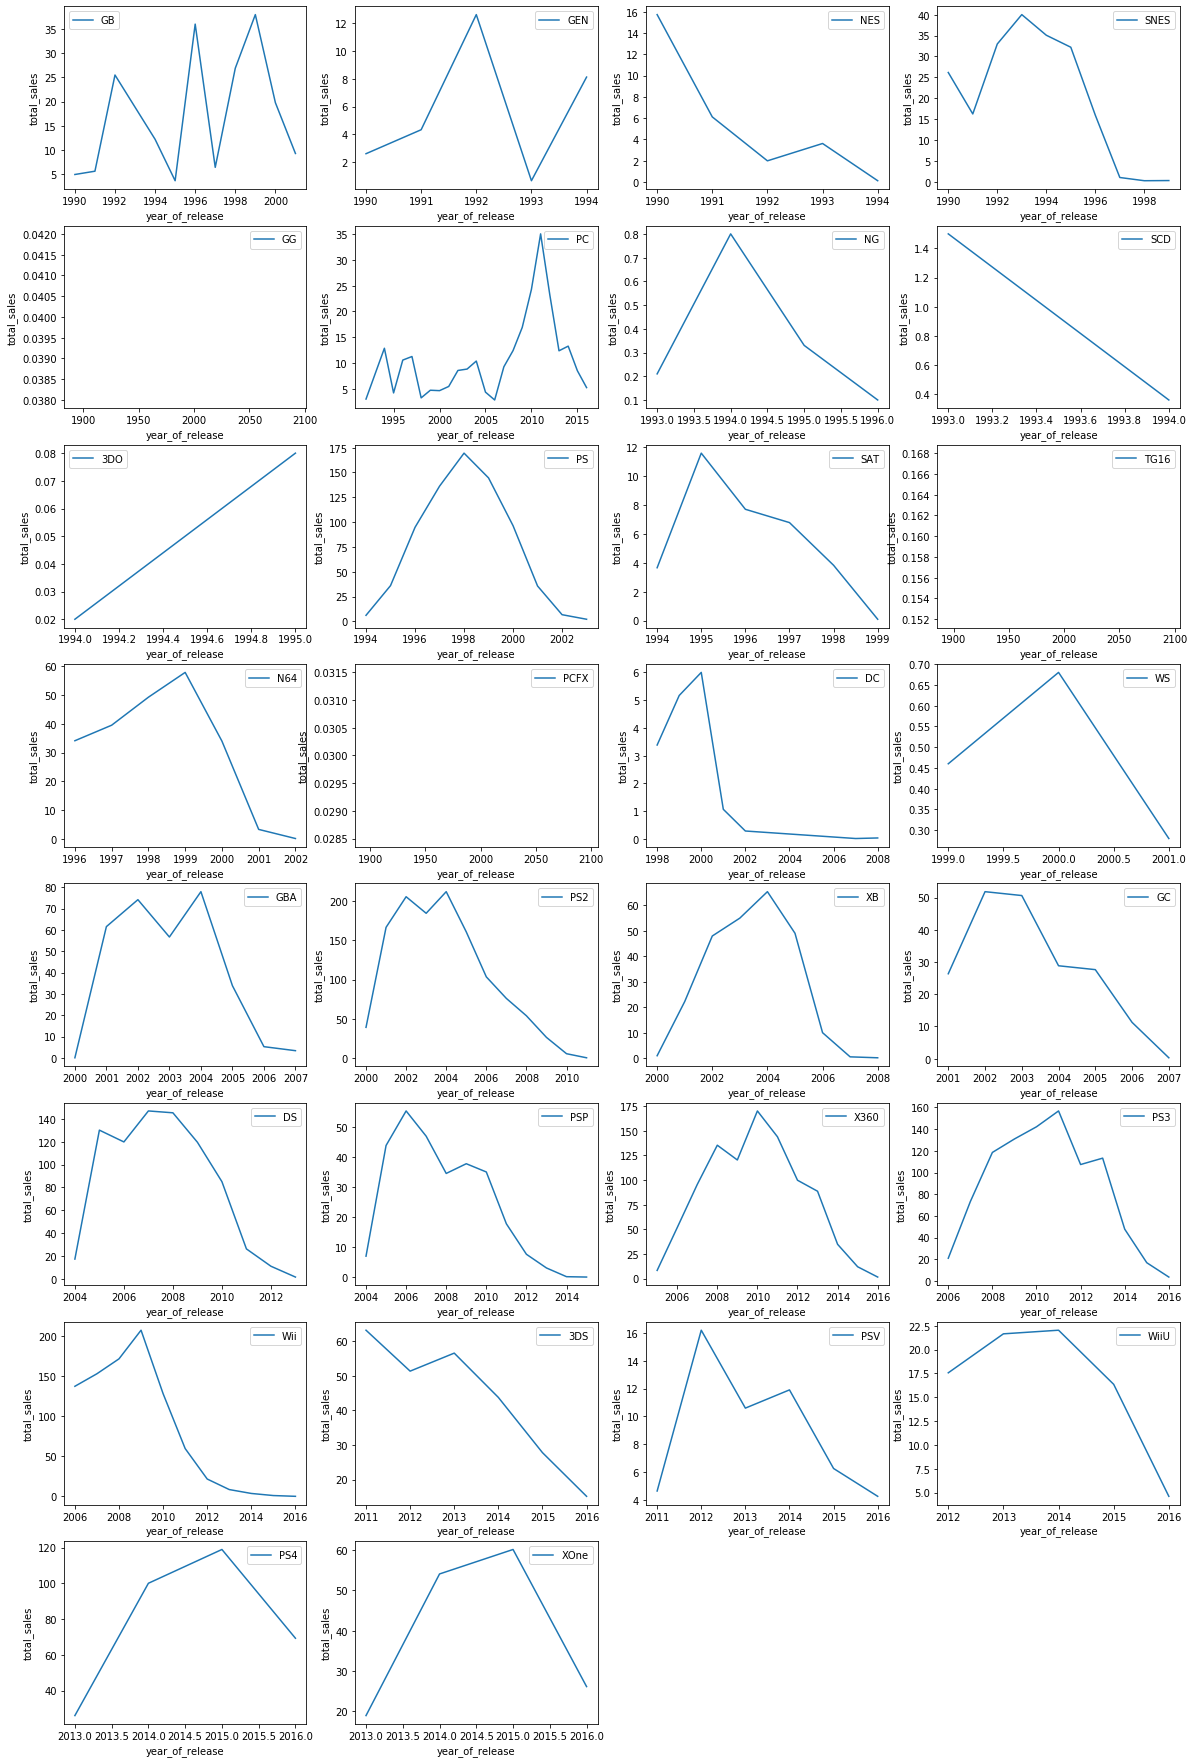

In [28]:
# сведем данные по общим продажам по годам и платформам, не забыв отсечь то что было до 1990 года
start_year=1990

pivot_platform = games_data.pivot_table(index=['year_of_release','platform'],
                                        values='total_sales',aggfunc='sum').reset_index().query('year_of_release >=@start_year')



# можно попробовать построить на 1 графике, но платформ слишком много, получается не информативно
#fig, ax = plt.subplots()
#for element in pivot_platform['platform'].unique():
#    data = pivot_platform.query('platform == @element').pivot_table(index=['year_of_release'],
#                                        values='total_sales',aggfunc='sum').reset_index().query('year_of_release >=@start_year')
#    ax.plot(data['year_of_release'], data['total_sales'], label =element)
    

#plt.legend()
#plt.show()


# построим несколько графиков на 1 фигуре
fig=plt.figure()
fig.set_size_inches(20,80)
i=1
for element in pivot_platform['platform'].unique():
    data = pivot_platform.query('platform == @element').pivot_table(
                                                                index=['year_of_release'],
                                                                values='total_sales',
                                                                aggfunc='sum').reset_index().query('year_of_release >=@start_year')
    
    
    ax = fig.add_subplot(20,4, i)
    ax.plot(data['year_of_release'], data['total_sales'], label =element)
    ax.set_xlabel('year_of_release')
    ax.set_ylabel('total_sales')
    plt.legend()
    i += 1


plt.show()



Отлично, по каждой платформе посмотрели, но посмотрим на платформы с наибольшими суммарными продажами

In [29]:
total_sales_per_platform = pivot_platform.pivot_table(index='platform', 
                                                      values='total_sales', 
                                                      aggfunc='sum').reset_index()

total_sales_per_platform.sort_values(by = 'total_sales', ascending = False)

,platform,total_sales
15,PS2,1233.56
27,X360,961.24
16,PS3,931.34
25,Wii,891.18
3,DS,802.76
14,PS,727.58
17,PS4,314.14
5,GBA,312.88
18,PSP,289.53
1,3DS,257.81


Поставим планку успешности платформы на 300 миллионах долларов и уберем лишние данные

In [30]:
good_total_sales_per_platform = total_sales_per_platform.query('total_sales>=300')
good_total_sales_per_platform 

,platform,total_sales
3,DS,802.76
5,GBA,312.88
14,PS,727.58
15,PS2,1233.56
16,PS3,931.34
17,PS4,314.14
25,Wii,891.18
27,X360,961.24


Посотрим на эти платформы более тщательно. Распределение продаж по годам

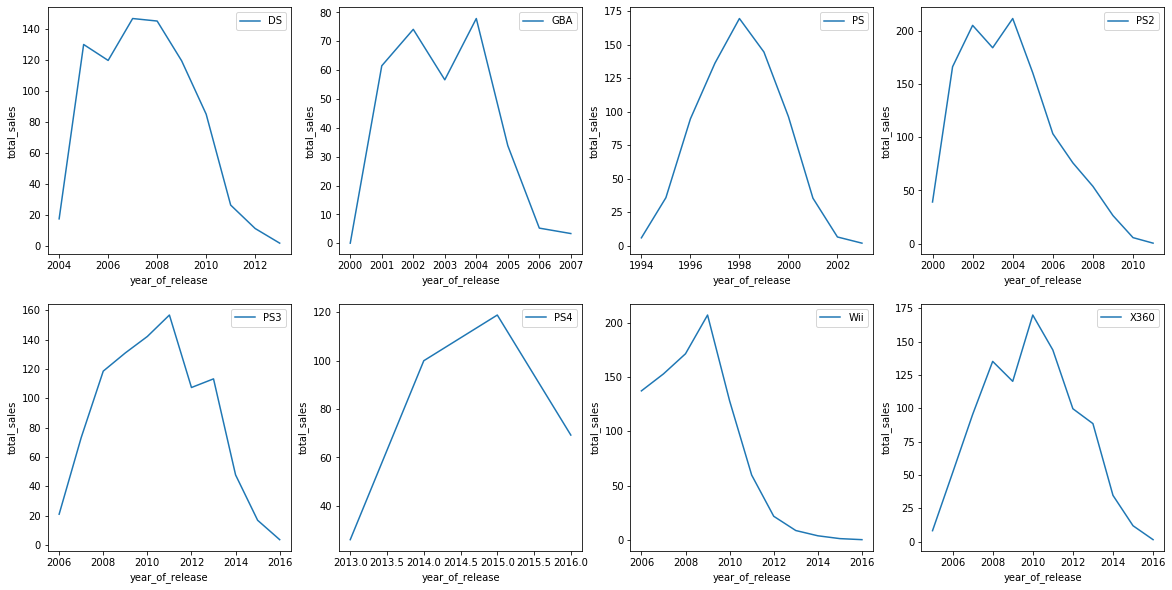

In [31]:
# построим несколько графиков на 1 фигуре
fig=plt.figure()
fig.set_size_inches(20,10)
i=1
for element in good_total_sales_per_platform['platform']:
    data = pivot_platform.query('platform == @element').pivot_table(index=['year_of_release'],
                                        values='total_sales',aggfunc='sum').reset_index().query('year_of_release >=@start_year')
    ax = fig.add_subplot(2,4, i)
    ax.plot(data['year_of_release'], data['total_sales'], label =element)
    ax.set_xlabel('year_of_release')
    ax.set_ylabel('total_sales')
    
    plt.legend()
    i += 1
plt.show()

Мы отобрали 8 платформ по суммарным продажам. В среднем цикл жизни платформы составляет 6-7 лет. И как этого и следовало ожидать, все эти платформы, за исключением PS4 уже погибают (у PS4 еще есть время). Однако нужно различать кто как погибает, так, например платформы Wii и X360 уже почти загнулись, в то время, как GBA и DS умерли совсем.
Попробует отобрать платформы по другому принципу - те платформы у которых продажи за последние 3 года были больше. Очевидно, что такие платформы находятся дальше от конца своего цикла жизни и соответственно являются более перспективными.

In [32]:
top_platform_for_past_three_years = pivot_platform.query(
    'year_of_release == 2016 or year_of_release == 2015 or year_of_release == 2014').pivot_table(
                        index='platform',values='total_sales', aggfunc='sum').reset_index().sort_values(
                                                                                            by='total_sales', 
                                                                                            ascending=False)
top_platform_for_past_three_years

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


 Как видим, при таком подходе, в наш рейтинг начали попадать платформы, которые ранее не были, например XOne. Поставим планку успешности в 50 миллионов долларов и посмотрим на продажи лидеров рейтинга по годам

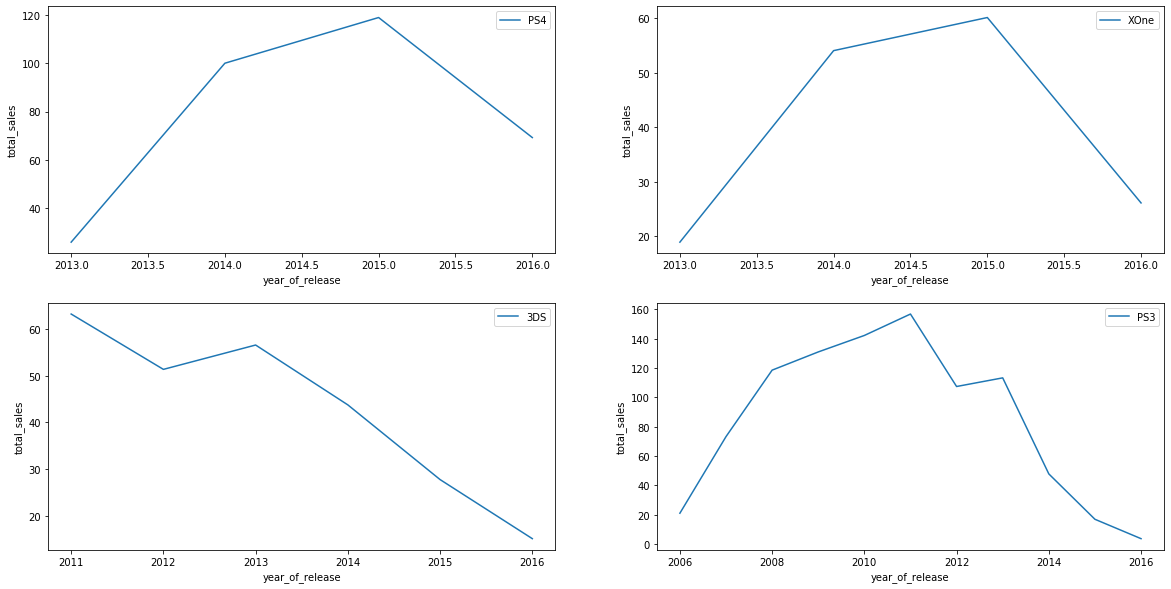

In [33]:
fig=plt.figure()
fig.set_size_inches(20,10)
i=1

for element in top_platform_for_past_three_years.query('total_sales >50')['platform']:
    data = pivot_platform.query('platform == @element').pivot_table(index='year_of_release', 
                                                            values='total_sales', 
                                                             aggfunc='sum').reset_index()
    ax = fig.add_subplot(2,2, i)
    ax.plot(data['year_of_release'], data['total_sales'], label =element)
    ax.set_xlabel('year_of_release')
    ax.set_ylabel('total_sales')
    
    plt.legend()
    i += 1
plt.show()

**Вывод**

Нельзя смотреть на перспективность платформы по общим продажам, без учета срока жизни платформы и стадии, на которой она находится. Так
в нашем случае очивидными перспективными платформами являются XOne и PS4, они хоть и находятся в зрелой стадии, но у них все еще остается в запасе несколько лет, а если бы смотрели по суммарным продажам за весь период, то XOne даже не попал бы в рейтинг.

**Summary:**
- средний срок жизни платформы 6-7 лет
- при оценки перспективности лучше смотреть на те платформы, которые показали лучшие результаты за последние 3 года
- перспективными платформами являются XOne и PS4, но они находятся в стадии зрелости
- PS4 почти в 2 раза более прибыльная чем XOne
- после 2010 года появилось всего 5 платформ, три из которых можно сказать, что погибли (3DS, PSV, WiiU), а две остальные мы отнесли к перспективным

**Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.**

Проверим велика ли разница в продажах и в средних продажах на разных платформах, а так же опишем результат.


In [34]:
# на предыдущих шагах мы выделили 2 перспективные платформы XOne и PS4, 
# определили, что эффективно смотреть данные за последние 3 года, поэтому сделаем срез по этим данным

perspective = games_data.query('(platform == "XOne" or platform == "PS4") and (year_of_release == 2016 or year_of_release == 2015 or year_of_release == 2014)')

perspective


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01



			 XOne 



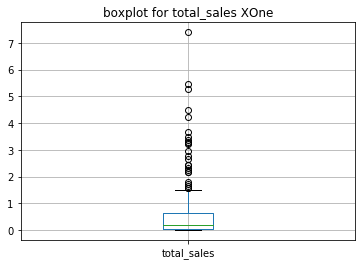

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64


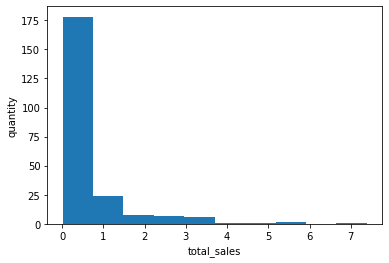


			 PS4 



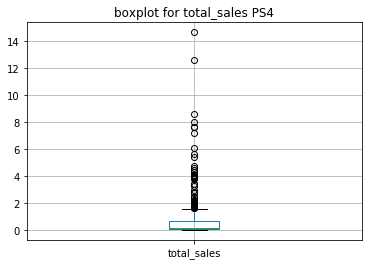

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64


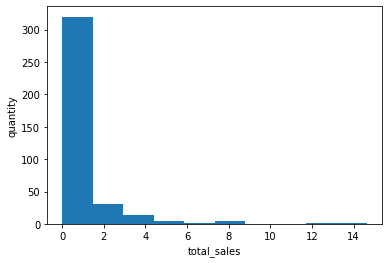

In [35]:
# напишем функцию, которая будем строить нам ящики с усами, даватьт описательную статистику и строить гистограмму

def boxplot_and_describe(frame, title, input_query, input_column):
    print('\n\t\t\t',title,'\n')
    if input_query == '':
        frame.boxplot(column = input_column)
        name = input_column+" "+title
        plt.title("boxplot for {}".format(name))
        plt.show()
        print(frame[input_column].describe())
        plt.show()
    else:
        frame.query(input_query).boxplot(column = input_column)
        name = input_column+" "+title
        plt.title("boxplot for {}".format(name))
        plt.show()
        print(frame.query(input_query)[input_column].describe())
        
        plt.hist(frame.query(input_query)[input_column])
        plt.xlabel(input_column)
        plt.ylabel('quantity')
        plt.show()
        

boxplot_and_describe(perspective, "XOne",'platform == "XOne"', 'total_sales')
boxplot_and_describe(perspective, "PS4", 'platform == "PS4"', 'total_sales')

**Вывод**

У обеих платформ датасет скошен вправо, что видно и по диаргамам размаха и по ящикам с усами и говорит о том, что на этих платформах не редки случаи, когда общие продажи игры выше медианного значения. При этом у игр на платформе PS4 медиана общих продаж незначительно меньше, чем у игр на Xone, что говорит о том, что в общей массе, игры вышедшие на XOne  более коммерчески успешные, чем на PS4. Однако разница в максимальных продажах и PS4 и XOne в 2 раза в пользу первых, говорит о том, что иногда, на PS4 встречаются "суперзвезды" среди игр и если мы собираемся делать именно такую игру, то стоит обратить свое внимание именно на PS4, как платформу и быть готовым к большей конкуренции, потому что игр под PS4 в полтора раза больше чем под XOne.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами, а затем сделаем выводы. По прежнему будем работать только с перспективными платформами, а поскольку мы хотим посмотреть по одной, то возьмем ту, в которой меньше игр - XOne. Вспомним, что у нас были строки, в которых не было рейтинга критиков и пользователей (мы их пометили как -1) и не забудем не учитывать такие строки

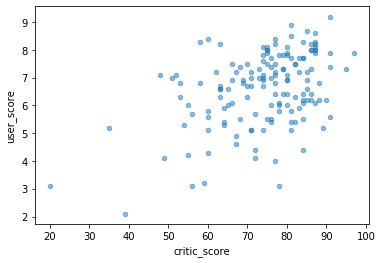

In [36]:
# построим диаграмму рассеевания
perspective.query('platform == "XOne" and critic_score>-1 and user_score>-1').plot(x='critic_score', y='user_score', kind='scatter', alpha=0.5)


Ну, впринципе, как и ожидалось, в большенстве своем, чем выше оценка критиков, тем лучше ее воспринимают пользователи. При этом, как это всегда бывает, есть и уникуму, которые не очень хорошо были оценены критиками, но зашли пользователям. Посмотрим на корреляцию между отзывами критиков и продажами, а так же между отзывами пользователей и продажами.

корреляция оценок критиков и общих продаж: 0.5288


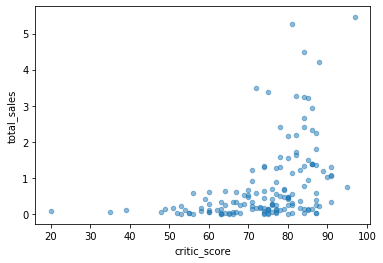

корреляция оценок пользователей и общих продаж: -0.0932


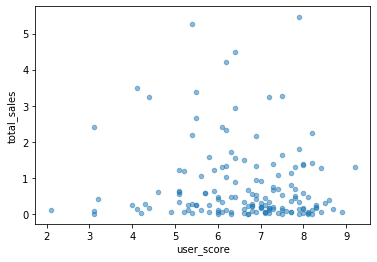

In [37]:

user_score_XOne = perspective.query('platform == "XOne" and critic_score>-1 and user_score>-1')['user_score']
critic_score_XOne = perspective.query('platform == "XOne" and critic_score>-1 and user_score>-1')['critic_score']
total_sales_XOne = perspective.query('platform == "XOne" and critic_score>-1 and user_score>-1') ['total_sales']

# корреляция между отзывами критиков и продажами
print("корреляция оценок критиков и общих продаж: {:.4f}".format(critic_score_XOne.corr(total_sales_XOne, method='spearman')))
perspective.query('platform == "XOne" and critic_score>-1 and user_score>-1').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.show()

# корреляция между отзывами пользователей и продажами
print("корреляция оценок пользователей и общих продаж: {:.4f}".format(user_score_XOne.corr(total_sales_XOne, method='spearman' )))
perspective.query('platform == "XOne" and critic_score>-1 and user_score>-1').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.show()

**Вывод**

При оценки корреляции между двумя параметрами мы сознательно применяли метод Спирмена, который более устойчив к быросам, а они у нас явно имеются (для того чтоб убедиться достаточно посмотреть на диаграмму рассеевания). Согласно корреляции, есть однонаправленная связь средней степени между продажами и оценками критиков и очень слабая (почти незаметная) разнонаправленная связь между оценками пользователей и продажами. Это все говорит, что по большому счету, при создании игры следует ориентироваться на менение критиков и тестерами и членами фокус-групп выбирать именно их, потому что они лидеры мнений и успешность игры почти на половину зависит от их мнения.

**Соотнесем выводы с продажами на других платформах.**

Поскольку мы выбрали перспективными две платформы и на одной из них уже посмотрели выводы, то посмотрим на сколько эти выводы соотносятся со второй платформой - PS4.  Так же как и в случае с XOne помним про -1 в user_score и critic_score

корреляция оценок критиков и общих продаж: 0.5288


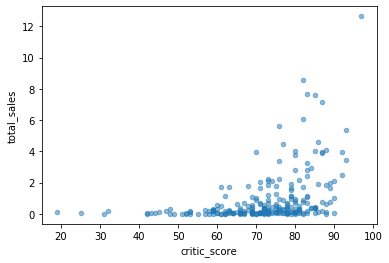

корреляция оценок пользователей и общих продаж: -0.0932


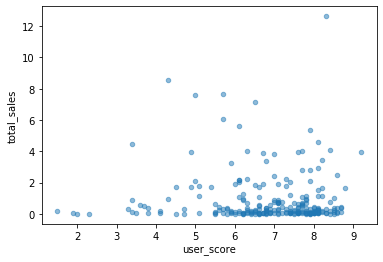

In [38]:
user_score_PS4 = perspective.query('platform == "PS4" and critic_score>-1 and user_score>-1')['user_score']
critic_score_PS4 = perspective.query('platform == "PS4" and critic_score>-1 and user_score>-1')['critic_score']
total_sales_PS4 = perspective.query('platform == "PS4" and critic_score>-1 and user_score>-1') ['total_sales']

# корреляция между отзывами критиков и продажами
print("корреляция оценок критиков и общих продаж: {:.4f}".format(critic_score_XOne.corr(total_sales_XOne, method='spearman')))
perspective.query('platform == "PS4" and critic_score>-1 and user_score>-1').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.show()

# корреляция между отзывами пользователей и продажами
print("корреляция оценок пользователей и общих продаж: {:.4f}".format(user_score_XOne.corr(total_sales_XOne, method='spearman' )))
perspective.query('platform == "PS4" and critic_score>-1 and user_score>-1').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.show()

**Вывод**

Как видно из коэффицентов корреляции и диаграм рассеевания, наши выводы основанные на данных о продажах XOne, легко подтверждаются и на продажах игр для PS4

**Посмотрим на общее распределение игр по жанрам.**

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
Напомним, что мы рассматриваем игры для 2х платформ: PS4 и XOne вышедшие за период с 2014 года.

In [39]:
# сведем все данные в одну табличку
perspective_genre = perspective.pivot_table(index=['year_of_release', 'genre'],
                                                      values= 'total_sales', aggfunc=('count','sum')).reset_index()

# переименуем стобцы для ясности
perspective_genre = perspective_genre.rename(columns={'count':'total_games','sum':'total_sales'})

# посчитаем средниц доход с 1 игры
perspective_genre['sales_per_game'] = perspective_genre['total_sales'] / perspective_genre['total_games']

# отсортируем по росту уменьшению этого показателя и по увелечинию года
perspective_genre.sort_values(by = ['year_of_release', 'sales_per_game'], ascending=[True, False])

,year_of_release,genre,total_games,total_sales,sales_per_game
7,2014,Shooter,17,41.08,2.416471
0,2014,Action,52,60.68,1.166923
8,2014,Sports,21,23.23,1.106190
4,2014,Platform,3,3.27,1.090000
5,2014,Racing,7,6.68,0.954286
3,2014,Misc,13,9.94,0.764615
6,2014,Role-Playing,11,7.29,0.662727
1,2014,Adventure,9,1.64,0.182222
2,2014,Fighting,1,0.16,0.160000
9,2014,Strategy,2,0.10,0.050000


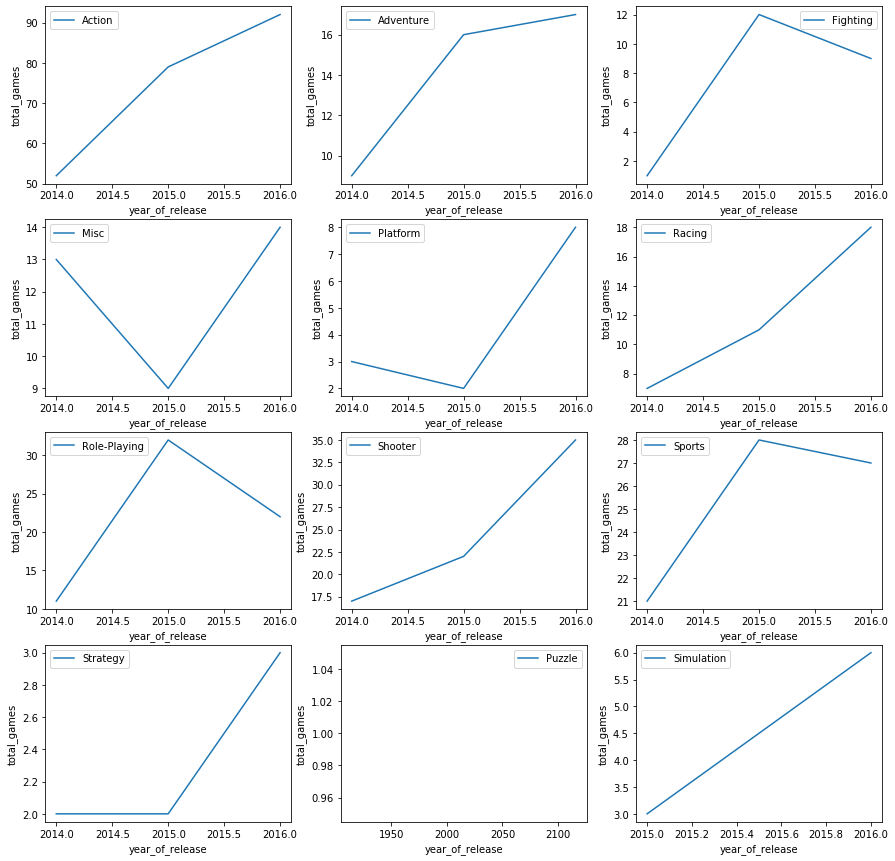

In [40]:
#Посмотрим графики количества игр в зависимости от жанра и года выпуска
fig=plt.figure()
fig.set_size_inches(15,15)
i=0
for element in perspective_genre['genre'].unique():
    i += 1
    if i<=12:
        data = perspective_genre.query('genre == @element').pivot_table(index='year_of_release',
                                            values='total_games',aggfunc='sum').reset_index()
        ax = fig.add_subplot(4,3,i)
        ax.plot(data['year_of_release'], data['total_games'], label =element)
        ax.set_xlabel('year_of_release')
        ax.set_ylabel('total_games')
        plt.legend()
    
plt.show()


Вроде бы все выглядит не плохо. Мы можем посмотреть как менялась средняя выручка с 1 игры каждого жанра за последние 3 года, мы можем посмотреть сколько игр каждого жанра было выпущено и на какую общую сумму они были проданы, но мы не можем ответить на поставленные вопросы, какой жанр самый прибыльный и какой наимении прибыльный, поэтому агрегируем данные по годам.

In [41]:
# сделаем новую срез
perspective_genre_all_period = perspective_genre.pivot_table(index='genre', values=['total_games','total_sales'], aggfunc='sum').reset_index()

# расчитаем среднюю выручку с игры в зависимости от жанра
perspective_genre_all_period['sales_per_game'] = perspective_genre_all_period['total_sales'] / perspective_genre_all_period['total_games'] 

# отсортируем по средней выручки с игры
perspective_genre_all_period.sort_values(by='sales_per_game', ascending = False)


,genre,total_games,total_sales,sales_per_game
8,Shooter,74,133.85,1.808784
10,Sports,76,73.69,0.969605
7,Role-Playing,65,39.54,0.608308
0,Action,223,122.68,0.550135
6,Racing,36,17.05,0.473611
4,Platform,13,6.04,0.464615
2,Fighting,22,9.90,0.450000
3,Misc,36,14.51,0.403056
1,Adventure,42,9.02,0.214762
9,Simulation,9,1.56,0.173333


**Вывод**

Самым перспективным жанром является жанр шутеров, он в течении всех трех последних лет занимал первую строчку по показателю средней выручки с одной игры, при этом игр выпущенных за эти три года, в 3 раза меньше чем у самого популярного жанра среди гейм-девелоперов - экшинов, корторые по этому же показателю занимают лишь 4 место.

Самыми не перспективными играми являются стратегии (пазлы мы опускаем, потому что за 3 года была выпущена лишь одна игра в этом жанра), так же к аутсайдерам можно причислить симуляторы.

Отдельно внимания заслуживают жанры занимающие 2 и 3 мето по средней выручки с игры - спортивные и ролевые игры. Они хоть и коммерчески успешны, но видимо ниша уже переполнена и количество релизоав в 2016 году меньше чем в 2015. Хотя это может быть неполнота данных за 2016 год.

## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [42]:
# помним, что не имеет смыла смотреть на данные старше 1990 года

platforms_per_region = games_data.query('year_of_release >=1990').pivot_table(index='platform', 
                                              values =['na_sales','eu_sales', 'jp_sales','other_sales'],
                                              aggfunc='sum').reset_index()

platforms_per_region

,platform,eu_sales,jp_sales,na_sales,other_sales
0,3DO,0.00,0.10,0.00,0.00
1,3DS,61.27,100.62,82.65,13.27
2,DC,1.69,8.56,5.43,0.27
3,DS,188.41,175.00,380.31,59.04
4,GB,39.68,68.61,73.01,6.73
5,GBA,74.59,46.56,184.12,7.61
6,GC,38.32,21.34,131.94,5.13
7,GEN,5.52,2.67,19.27,0.89
8,GG,0.00,0.04,0.00,0.00
9,N64,41.03,33.76,138.91,4.31


In [43]:
# посмотрим топ-5 платформ по каждому региону
# сразу напишем функцию так, чтоб потом ее переиспользовать 

def top_platforms_per_region(frame, column, region):
    print('Топ-5 по показателю {}'.format(region))
    pivot = frame.pivot_table(index= column, 
                                     values=region, 
                                     aggfunc='sum').sort_values(
                                                    by=region, 
                                                    ascending=False).head().reset_index()
   
    print(pivot)
    print('общие продажи топ-5:{: .2f}'.format(pivot[region].sum()), '\n')


regions = ['na_sales','eu_sales', 'jp_sales','other_sales']
column = 'platform'
for region in regions:
    top_platforms_per_region(platforms_per_region, column, region)

Топ-5 по показателю na_sales
  platform  na_sales
0     X360    595.74
1      PS2    572.92
2      Wii    486.87
3      PS3    390.13
4       DS    380.31
общие продажи топ-5: 2425.97 

Топ-5 по показателю eu_sales
  platform  eu_sales
0      PS2    332.63
1      PS3    327.21
2     X360    268.32
3      Wii    258.32
4       PS    212.39
общие продажи топ-5: 1398.87 

Топ-5 по показателю jp_sales
  platform  jp_sales
0       DS    175.00
1       PS    139.78
2      PS2    137.54
3     SNES    116.55
4      3DS    100.62
общие продажи топ-5: 669.49 

Топ-5 по показателю other_sales
  platform  other_sales
0      PS2       190.47
1      PS3       134.59
2     X360        84.88
3      Wii        77.71
4       DS        59.04
общие продажи топ-5: 546.69 



Отлично, тут мы посмотрели на абсолютных лидеров. Самой успешной платформой по охвату рынков однозначно является PS2, она присутствует в топах на всех четырех. X360, Wii, PS3, DS присутствуют в топах на трех рынках, а вот PS, 3 DS и SNES присутствуют в топе только на японском рынке. При этом платформы в топе на американском, европейском и других рынках разнятся не сильно и в основном по местам. Все это может говорить о том, что пока все рынки ориентируются на американские платформы японский рынок показывает удивительную самобытность и развивается несколько в стороне от мейнстрима. Возможно это связано с культурой видео-игр глубоко и тесно переплетенной с мангой и аниме.

In [44]:
genre_per_region = games_data.query('year_of_release >=1990').pivot_table(index='genre', 
                                              values =['na_sales','eu_sales', 'jp_sales','other_sales'],
                                              aggfunc='sum').reset_index()
genre_per_region

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,506.70,151.83,825.27,181.62
1,Adventure,62.68,50.63,98.95,16.29
2,Fighting,98.31,84.36,216.99,35.76
3,Misc,210.40,102.16,396.22,73.07
4,Platform,186.15,98.26,370.10,48.78
5,Puzzle,44.35,44.21,77.44,11.14
6,Racing,233.13,52.94,350.04,75.28
7,Role-Playing,188.24,340.71,328.98,57.90
8,Shooter,311.69,33.38,533.99,102.53
9,Simulation,113.28,63.64,179.98,30.55


In [45]:
# посмотрим топ-5 жанров по каждому региону

regions = ['na_sales','eu_sales', 'jp_sales','other_sales']
column = 'genre'
for region in regions:
    top_platforms_per_region(genre_per_region, column, region)

Топ-5 по показателю na_sales
      genre  na_sales
0    Action    825.27
1    Sports    660.05
2   Shooter    533.99
3      Misc    396.22
4  Platform    370.10
общие продажи топ-5: 2785.63 

Топ-5 по показателю eu_sales
     genre  eu_sales
0   Action    506.70
1   Sports    368.76
2  Shooter    311.69
3   Racing    233.13
4     Misc    210.40
общие продажи топ-5: 1630.68 

Топ-5 по показателю jp_sales
          genre  jp_sales
0  Role-Playing    340.71
1        Action    151.83
2        Sports    116.73
3          Misc    102.16
4      Platform     98.26
общие продажи топ-5: 809.69 

Топ-5 по показателю other_sales
     genre  other_sales
0   Action       181.62
1   Sports       131.85
2  Shooter       102.53
3   Racing        75.28
4     Misc        73.07
общие продажи топ-5: 564.35 



По жанрам картинка так же интересная, потому что Япония и тут выделяется. Так в Америке, Европе и остальном мире топ 5 отличается всего на 1 позицию (платформы в Амирике и гонки в остальных), а Япония как будто вобрала в себя лучшее из всего мира: акшины, спортивные и музыкальные симуляторы - а так же платформы как в Америке, но и не забыла добавить ролевые игры, которые, кстати, являются сам популярным жанром в Японии.

In [46]:
# посмотрим влияет ли рейтинг esrb на продажи по регионам

esrb = games_data.query('year_of_release >=1990 and rating != "unknown"')

# корреляция рейтинга и продаж 
for region in regions:
    print("корреляция",region,"и рейтинга esrb:",esrb['rating'].corr(esrb[region], method='spearman'))

корреляция na_sales и рейтинга esrb: -0.03869014789243224
корреляция eu_sales и рейтинга esrb: 0.10007132627354559
корреляция jp_sales и рейтинга esrb: 0.15993354076341587
корреляция other_sales и рейтинга esrb: 0.054911541021708844


Получаается, что рейтинг esrb влияет более-менее заметно на продажи в европе и японии, а вот в Америке и других регионах его влияние совсем не существенное.

***Вывод***

При детальном анализе продаж по регионам выяснилось очевидное: есть по большому счету 2 рынка, которые похожи друг на друга в плане жанров игр, и мало похожи в плане платформ - эти два рынка Япония и весь остальной мир.

В Японии играют в ролевые игры, акшины, спортивные и музыкальные симуляторы, а так же в платформенные игры на DS, PS2, PS, SNES и 3DS

В остальном мире предпочитают акшины, шутеры, спортивные и музыкальные симуляторы и либо гонки, либо платформенные игры, в которые играют на X360, PS2, Wii, PS3, DS

Отличительной особенностью является то, что в Японии шутеры не входят в топ-5 популярных жанров.

При этом, если смотреть на рейтинг esrb, то его влияние на продажи достаточно похож на влияние на рынке европы, то есть рынок япониии достаточно сильно зарегулирован, как и европейский. 
По размеру рынки расположены в следующей последовательности: Америка, Европа, Япония, остальной мир.

Таким образом, если мы хотим выпустить популярную игру, то следует сосредоточится на акшинах, спортивных или музыкальных симуляторах. Как мы выяснили ранее, на текущий момент всего 2 платформы популярны, поэтому следует ориентироваться на них (там самая популярная была PS4, а как мы видим, Японский игрок приучен к PlayStation).

## Проверка гипотез

Проверим две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Помним, что мы берем данные не старше 1990 года, а так же что у нас в столбце пользовательских рейтингов есть незаполненные данные, которые помечены как -1.

>**_<span style="color:blue">
    Поскольку мы собираемся проверять гипотезы о равенстве средних, то для проверки используем t-критерий Стьюдента. Для этого используем метод st.ttest_ind, которому передадим два вектора и, поскольку нет оснований полагать, что выборки взяты из схожих по параметрам совокупностей (хотя бы потому, что это разные платформы, одна перспективная, другая не очень, да и пользователи платформ, скорее всего, разные, а раз разные игроки, то у них и разные критерии оценивания игр, разные вещи на которые они обращают внимание), то необязательный параметр equal_var будем указывать как False, он по умолчанию в позиции True. В этом случае дисперсия каждой выборки будет оценена для каждой по отдельности по значениям в ней самой,а не по объединённому датасету из двух выборок. Мы, конечно немного потеряем в точности, но можем быть уверены, что не пролетим, если дисперсия выборок будет сильно разниться.
</span>_**

Для первой гипотезы о различии средних рейтингов пользователей разных платформ, нулевая гипотеза будет звучать как "средний рейтинг пользователей XOne не отличается от среднего рейтинга пользователей PC", а альтернативная - " средний рейтинг пользователей XOne и PC различается", причем в альтернативной гипотезе нас не интересует, в какую сторону отличие.

In [65]:
# проверим первую гипотезу
# возьмем данные
data_for_check = games_data.query('year_of_release >=1990 and user_score>-1').pivot_table(index=['platform','year_of_release','genre'], values='user_score', aggfunc='mean').reset_index()

alpha = .05     # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

# чтоб не терять точность где ее можно не терять, посмотрим какой параметр equal_var ставить, в зависимости от дисперсии выборок
var_1 = np.array(data_for_check.query('platform == "XOne"')['user_score']).var()
var_2 = np.array(data_for_check.query('platform == "PC"')['user_score']).var()

# если дисперсии выборок отличаются на 5% и более, то оцениваем дисперсию каждой выборки по отдельности, иначе по объединенному датасету
if(max(var_1,var_2)/min(var_1,var_2)-1)>0.05:


    results = st.ttest_ind(
        data_for_check.query('platform == "XOne"')['user_score'],
        data_for_check.query('platform == "PC"')['user_score'],
        equal_var  = False
        )
else:
    results = st.ttest_ind(
        data_for_check.query('platform == "XOne"')['user_score'],
        data_for_check.query('platform == "PC"')['user_score']
        )
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0027394106208440006
Отвергаем нулевую гипотезу


Вероятность случайно получить различие средних пользовательских рейтингов на генеральных совокупностях пользователей PC и Xbox One мала, поэтому ***отвергаем нулевую гипотезу*** о равенстве средних пользовательских рейтингов. Другими словами, мы не отвергаем гипотезу, что среднее рейтинги пользователей Xone и PC различаются.

Проверим вторую гипотезу. Для нее нулевая гипотеза будет звучать как "Средние пользовательские рейтинги жанров  Action и Sport - одинаковые", а альтернативная "Средние пользовательские рейтинги жанров  Action и Sport - разные", причем в альтернативной гипотезе нас не интересует в какую сторону отличие.

In [66]:
# проверим вторую гипотезу

# чтоб не терять точность где ее можно не терять, посмотрим какой параметр equal_var ставить, в зависимости от дисперсии выборок
var_1 = np.array(data_for_check.query('genre == "Action"')['user_score']).var()
var_2 = np.array(data_for_check.query('genre == "Sports"')['user_score']).var()

# если дисперсии выборок отличаются на 5% и более, то оцениваем дисперсию каждой выборки по отдельности, иначе по объединенному датасету
if(max(var_1,var_2)/min(var_1,var_2)-1)>0.05:

    results = st.ttest_ind(
        data_for_check.query('genre == "Action"')['user_score'],
        data_for_check.query('genre == "Sports"')['user_score'],
        equal_var = False
        )
else:
    results = st.ttest_ind(
        data_for_check.query('genre == "Action"')['user_score'],
        data_for_check.query('genre == "Sports"')['user_score']
        )
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.0034442296252121442
Отвергаем нулевую гипотезу


Вероятность случано получить различие средних рейтингов на генеральных совокупностях игроков предпочитающих жанры Action и Sport мала, а это значит что мы ***отвергаем нулевую гипотезу*** о том, что "средние пользовательские рейтинги жанров Action и Sport - одинаковые". Другими словами, мы не отвергаем гипотезу о том, что  "средние пользовательские рейтинги жанров Action и Sport - разные".

***вывод***
- Мы отвергаем гипотезу о том, что среднее рейтинги пользователей Xone и PC различаются. С вероятностью ошибки на 5% уровне вероятность отвегнуть правильную гипотезу составляет всего 0.34%
- мы не отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sport - разны. С вероятностью ошибки на 5% уровне вероятность отвегнуть правильную гипотезу составляет всего 0.28%

## Общий вывод

Главный вопрос исследования: "выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании".


В ходе исследования были определены 8 потенциально перспективных платформ, а затем, благодоря определению среднего срока жизни платформы (6-7 лет), были отсечены те, которые находятся в стадии умирания. Таким образом перспективных платформ оказалось 2: Xbox One и Sony PlayStation. При этом, за последние 3 года, продажи игр на платформе Sony почти в 2 раза больше чем на Xbox. Однако игры вышедшые на Xbox One в среднем более коммерчески успешные (возможно потому что выбор самих игр у пользователей меньше в 1.5 раза), а разница в максимальных продажах и PS4 и XOne в 2 раза в пользу первых, говорит о том, что иногда, на PS4 встречаются "суперзвезды" среди игр и если мы собираемся делать именно такую игру, то стоит обратить свое внимание именно на PS4, как платформу и быть готовым к большей конкуренции. Если же мы хотим сделать "проходную", а не "культовую" игру, то нам следует выбрать Xbox.

Так же при создании игры следует ориентироваться на менение критиков. Тестеров и членов фокус-групп выбирать именно из их, потому что они лидеры мнений и успешность игры почти на половину зависит от их мнения. 

Если мы будем говорить про жанры, то в зависимости от того на какой регион продаж игра ориентированны следует выбирать свой жанр. Если мы ориентированы на продажи во всем мире, то имеет смысл выпускать игру в жанре Action, спортивный или музыкальный симулятор, а если нам не важен регион продаж, а наша единственная цель это заработать побольше денег, то имеет смысл выпускать шутер, но этот жанр входит в топ-5 популярных жанров лишь в европе и северной америке. И совершенно точно, нужно быть готовым к тому, что esrb рейтинг игры будет оказывать влияние на продажи игры на европейском и японском рынках.

В исследовании мы так же проверили 2 гипотезы, одну из которых отвергли, а вторую приняли. Мы овергли гипотезу о том, что средний рейтинг пользователей для игр под Xbox One отличен от среднего рейтинга пользователей для игр под PC и не отвергли гипотезу о том, что средняя оценка пользователями игр в жанре Action и Sports - различны. 


